In [71]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
import numpy as np
from datetime import datetime
from calc_sensor import mcoms
from get_cal_sn import get_cal

In [72]:
SN = 1489 #Update for each float
root = '/Users/katttdaddyyyy/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu'
filelocation = root + '/Shared drives/WHOI Argo/BGC/Float Tracking/' + 'pressure_test_results/' + 'combined_test_results/' + str(SN) + '_pressure_test_results' + ".xlsx"
df = pd.read_excel(filelocation)
display(df)

,Unnamed: 0,DATE,BUOYANCY_POSITION,ITERATION,HUMIDITY,PRES,TEMP,PSAL,O2_PHASE_DELAY,O2_TEMPERATURE_VOLTAGE,...,MCOMS2,MCOMS3,PH_VRS1,PH_VRS,PH_VK,PH_IK,PH_IB,PH_VIN,PH_VOUT,SN
0,0,2023-05-17 09:58:42.224,746,0,21.02,35.5,20.6440,31.984,24.400,0.635886,...,12163,319,-0.863638,-0.863352,-0.977268,-4.590000e-08,-2.200000e-08,7.03,7.06,1489
1,1,2023-05-17 10:00:10.030,697,1,20.92,33.8,20.6495,31.971,21.321,0.635695,...,12134,318,-0.864356,-0.863907,-0.977047,-4.600000e-08,-2.220000e-08,7.03,7.06,1489
2,2,2023-05-17 10:01:04.499,598,1,20.92,34.3,20.6561,31.971,20.573,0.635570,...,12030,317,-0.864744,-0.864081,-0.976621,-4.600000e-08,-2.100000e-08,7.03,7.06,1489
3,3,2023-05-17 10:01:58.932,598,1,20.86,35.6,20.6623,31.971,20.321,0.635419,...,12060,327,-0.864914,-0.864290,-0.976363,-4.670000e-08,-2.390000e-08,7.03,7.06,1489
4,4,2023-05-17 10:02:53.428,598,1,20.84,36.5,20.6679,31.971,20.234,0.635299,...,12244,318,-0.865093,-0.864442,-0.976154,-4.250000e-08,-2.120000e-08,7.03,7.06,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,857,2023-05-18 12:48:59.692,33,10,21.63,1535.2,20.7924,31.445,20.104,0.632726,...,10729,294,-0.876999,-0.876556,-0.975825,-4.370000e-08,-1.850000e-08,7.04,7.07,1489
858,858,2023-05-18 12:49:54.222,33,10,21.68,1721.7,20.8370,31.445,20.140,0.631815,...,10691,295,-0.877553,-0.877162,-0.976197,-4.740000e-08,-2.230000e-08,7.04,7.07,1489
859,859,2023-05-18 12:50:48.734,33,10,21.73,1908.3,20.8803,31.444,20.169,0.630954,...,10699,299,-0.878055,-0.877673,-0.976499,-4.320000e-08,-2.030000e-08,7.04,7.07,1489
860,860,2023-05-18 12:51:43.205,33,10,21.80,1650.0,20.7977,31.441,20.188,0.632844,...,10712,295,-0.877491,-0.876517,-0.975469,-4.230000e-08,-2.250000e-08,7.04,7.07,1489


In [73]:
meta = get_cal(SN)
meta

,CTD_CNDC,CTD_TEMP,CTD_PRES,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH
SENSOR_MAKER,SBE,SBE,DRUCK,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE
SENSOR_MODEL,SBE41CP_V5.3.5,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET
SENSOR_SERIAL_NO,18115,18115,12254723,3253,370,370,370,1971,720-11976
SENSOR_CALIB_DATE,2022-09-11,2022-09-11,2022-09-07,2022-08-18,None,None,None,None,2022-09-19
COMMENTS,None,None,,None,,,,None,"added K2f0, K2f1, K2f2, K2f3; O-Ring: Si S"
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.01875, 'H': 0.1392335, 'I': -0.000280...","{'TA0': -0.0008469718, 'TA1': 0.0002897291, 'T...","{'PA0': 0.3339194, 'PA1': 0.0003907655, 'PA2':...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 49, 'SCALE_CDOM': 0.005626}","{'DARK_CHLA': 51, 'SCALE_CHLA': 0.001868}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.0045929, -0.00626375, 99.0, 0.0007...","{'F0': -1.283306923356, 'F1': 1.423471091636e-..."


In [74]:
# need different calibration coefficients for each one 
cal1  = meta["FLUOROMETER_CDOM"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal1

cal2 = meta["FLUOROMETER_CHLA"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal2
print(cal2)

cal3 = meta["BACKSCATTERINGMETER_BBP700"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal3


{'DARK_CHLA': 51, 'SCALE_CHLA': 0.001868}


{'KHI': 1.097,
 'BETASW700': 'calculated at 124 angularDeg',
 'DARK_BACKSCATTERING700': 48,
 'SCALE_BACKSCATTERING700': 3.957e-07}

In [75]:
fcdom = mcoms(scale=(cal1["SCALE_CDOM"]),dark=(cal1["DARK_CDOM"]),counts=(df["MCOMS1"]))
fcdom 

fchla = mcoms(scale=(cal2["SCALE_CHLA"]),dark=(cal2["DARK_CHLA"]),counts=(df["MCOMS2"]))
fchla 

bbp = mcoms(scale=(cal3["SCALE_BACKSCATTERING700"]),dark=(cal3["DARK_BACKSCATTERING700"]),counts=(df["MCOMS3"]))
bbp

date = pd.to_datetime(df['DATE'])
#print(time)
#print(fcdom)
data = pd.concat([fcdom,fchla,bbp], axis=1)
data

display(fcdom.describe())
display(fchla.describe())
display(bbp.describe())



count    862.000000
mean       0.147523
std        0.015151
min       -0.045008
25%        0.140650
50%        0.146276
75%        0.157528
max        0.196910
Name: MCOMS1, dtype: float64

count    862.000000
mean      20.584164
std        0.520638
min       19.840028
25%       20.148248
50%       20.429382
75%       20.973904
max       22.813884
Name: MCOMS2, dtype: float64

count    862.000000
mean       0.000102
std        0.000004
min        0.000082
25%        0.000099
50%        0.000102
75%        0.000105
max        0.000120
Name: MCOMS3, dtype: float64

In [76]:
# Only need this chunk of code if there are extreme outliers based on summary stats above.

## Is there a way to "ignore" or "exlcude" outliers without changing the length of the array?
## Now that the array length is changed for fcdom, we can't plot all MCOMS on same figure.

#fcdom1 = []
#time = []
#pres = []
#for i, x in enumerate(fcdom):
    #if fcdom[i] < 2 and fcdom[i] > 0:
        #fcdom1.append(fcdom[i])
        #time.append(date[i])
        #pres.append(df['PRES'][i])

#display(len(fcdom1))

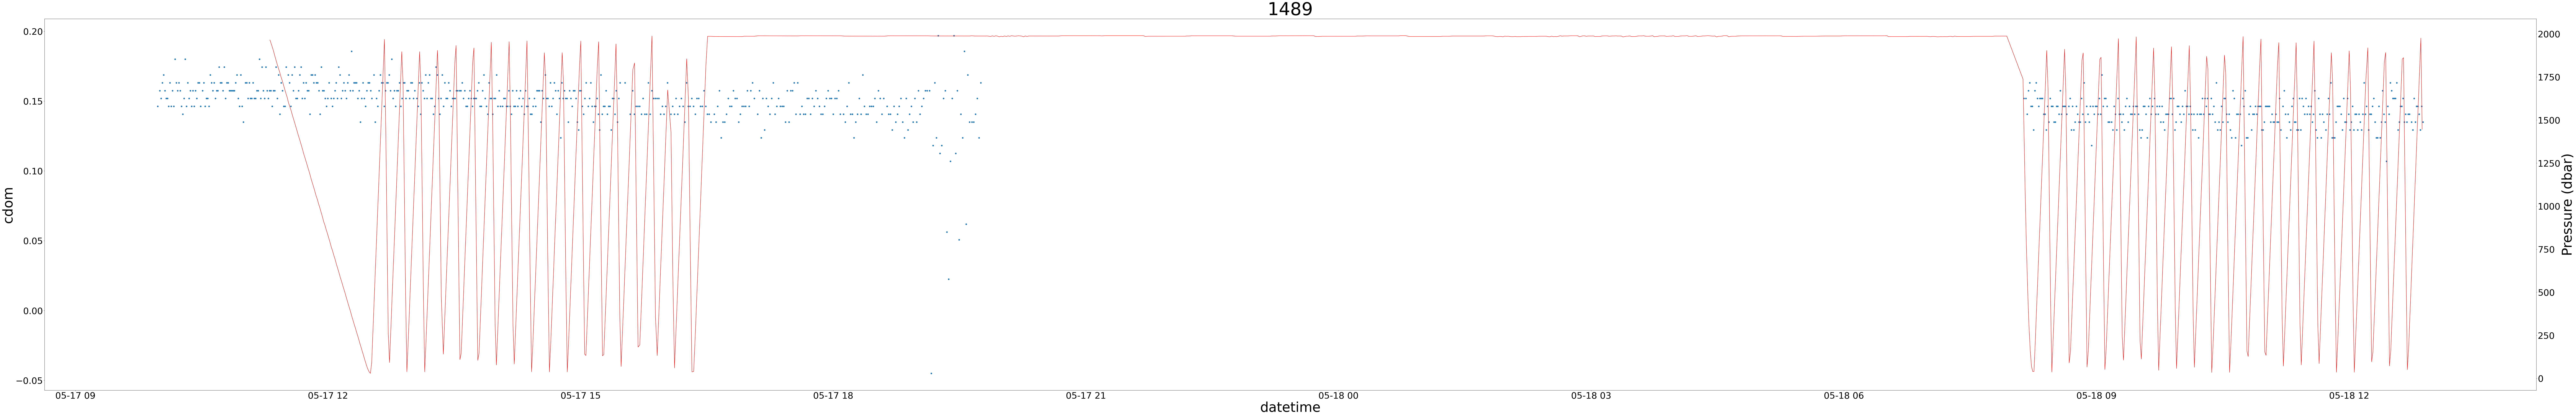

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, fcdom) #Update variable if code chunk above is uncommented 
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('cdom', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(time, pres, color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)


(array([19494.375, 19494.5  , 19494.625, 19494.75 , 19494.875, 19495.   ,
        19495.125, 19495.25 , 19495.375, 19495.5  ]),
 [Text(19494.375, 0, '05-17 09'),
  Text(19494.5, 0, '05-17 12'),
  Text(19494.625, 0, '05-17 15'),
  Text(19494.75, 0, '05-17 18'),
  Text(19494.875, 0, '05-17 21'),
  Text(19495.0, 0, '05-18 00'),
  Text(19495.125, 0, '05-18 03'),
  Text(19495.25, 0, '05-18 06'),
  Text(19495.375, 0, '05-18 09'),
  Text(19495.5, 0, '05-18 12')])

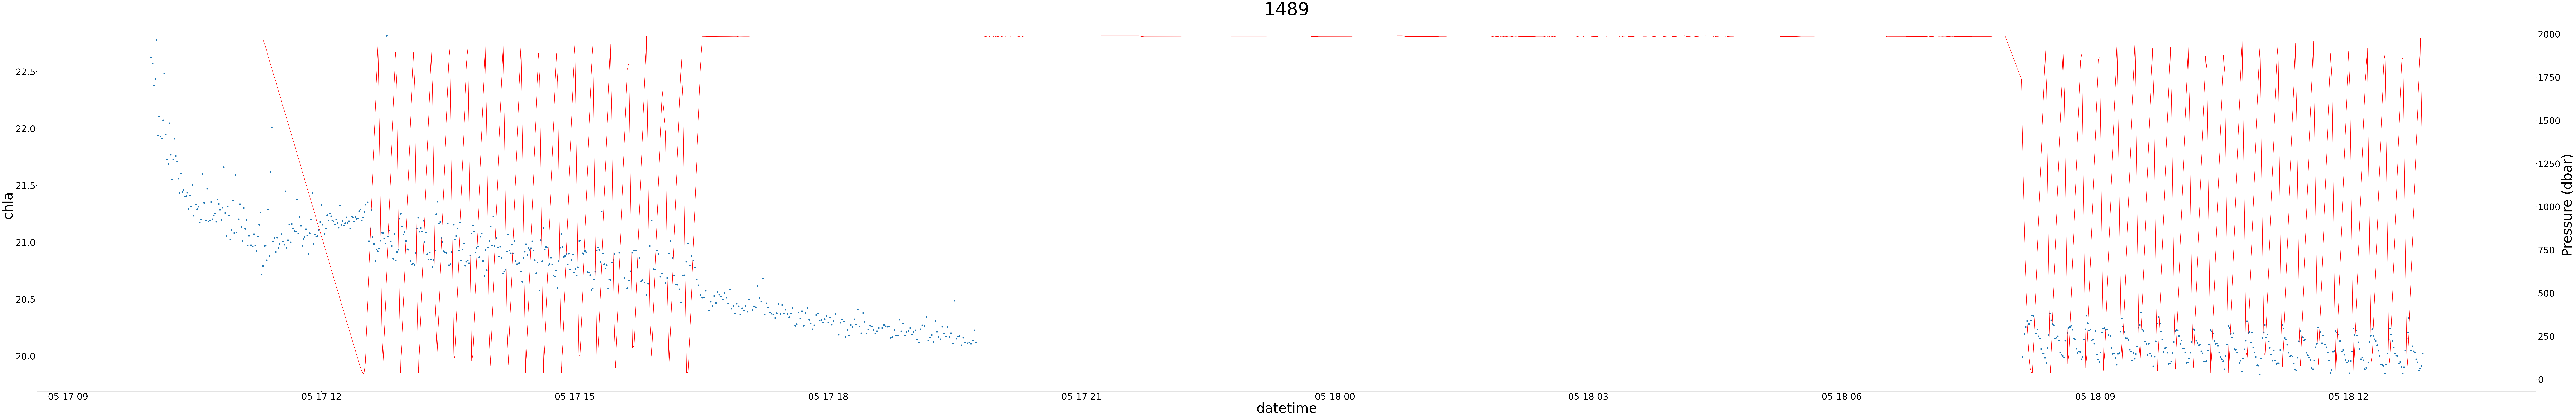

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, fchla)
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('chla', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(time, pres, color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)
plt.xticks(rotation =75)

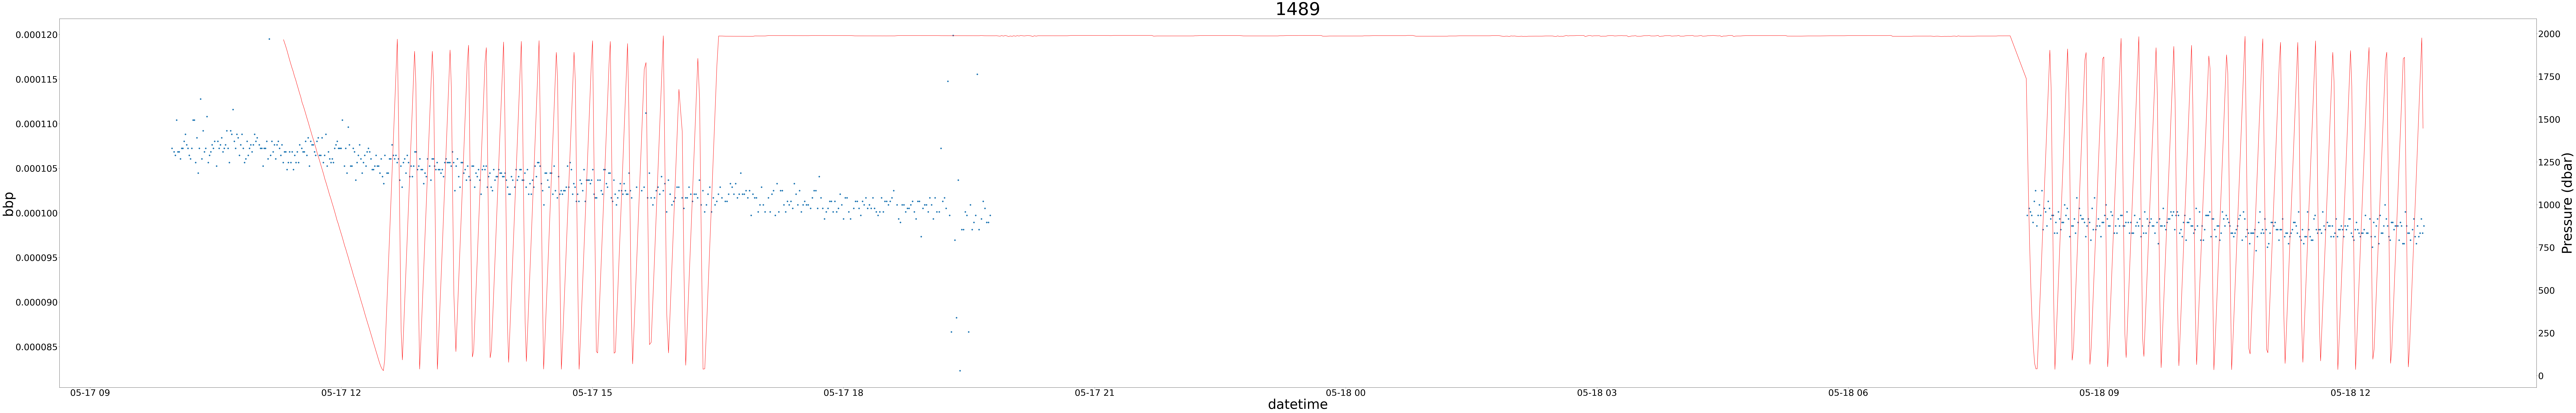

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, bbp)
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('bbp', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(time, pres, color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)